In [1]:
import matplotlib.pyplot as plt

from meerkat import thermistor

### I. Online Example  
Following these calculations:  
http://www.signalpro.biz/steinhart.pdf

In [2]:
# Example Thermistor Values
t1 = 43.33
r1 = 4.664 * 1000
t2 = 10
r2 = 19.900 * 1000
t3 = -3.9
r3 = 39.919 * 1000

In [3]:
A = thermistor.compose_array(t1, t2, t3, r1, r2, r3)
A

[[1, 8.447628728030327, 602.8433232875175, 0.0031597573306370074],
 [1, 9.898475010712584, 969.8506764663667, 0.003531696980399082],
 [1, 10.59460768001144, 1189.1992812737158, 0.003714020427112349]]

In [4]:
abc = thermistor.gauss(A)
print('  A            B            C')
print(['{:>4.3E}'.format(x) for x in abc])

  A            B            C
['1.131E-03', '2.338E-04', '8.930E-08']


Which is basically correct.  Note there is a transcription error where ln(R3)\**3 = 1188.994 is copied to 1199.004 and the 1199 value used for the remaining calculations - so a2 is a little different since 1188 is used here.  They calculated:  
```
a0 = 1.133E-3
a1 = 2.334E-4
a2 = 9.056E-8
```

### II. Semitec 103AT-2 Calibration Check  
https://www.thinksrs.com/downloads/programs/therm%20calc/ntccalibrator/ntccalculator.html  

In [5]:
# 103AT Thermistor Values from the datasheet, r values are listed as kohms
t1 = 10
r1 = 17.96 * 1000
t2 = 20
r2 = 12.09 * 1000
t3 = 40
r3 = 5.827 * 1000
test_t = 30
test_r = 8.313 * 1000

In [6]:
A = thermistor.compose_array(t1, t2, t3, r1, r2, r3)

In [7]:
abc = thermistor.gauss(A)
print('  A            B            C')
print(['{:>4.3E}'.format(x) for x in abc])

  A            B            C
['8.828E-04', '2.523E-04', '1.884E-07']


In [8]:
tC = thermistor.steinhart_hart(test_r, *abc)
print('  Expected Temperature: {:6.6f} C'.format(test_t))
print('Calculated Temperature: {:6.6f} C'.format(tC))

  Expected Temperature: 30.000000 C
Calculated Temperature: 29.996098 C


### III. Semitec 103AT Measurement

In [9]:
# measured with AD1115, warm room temperature ~26C
Rt = 9087.890966276429

In [10]:
s103AT = thermistor.Semitec103AT()

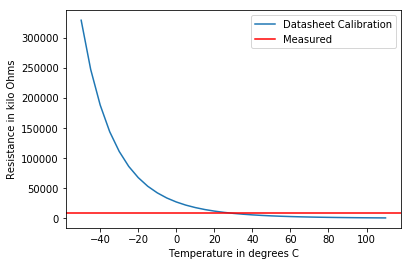

In [11]:
plt.plot(s103AT.cal_ts, s103AT.cal_rs, label='Datasheet Calibration');
plt.axhline(Rt, color='r', label='Measured')
plt.xlabel('Temperature in degrees C');
plt.ylabel('Resistance in kilo Ohms');
plt.legend();

#### 1. Find nearest coefficients to the measured resistance

In [12]:
A = thermistor.compose_array(*s103AT.find_nearest(Rt))

In [13]:
abc = thermistor.gauss(A)
print(['{:>4.3E}'.format(x) for x in abc])

['1.041E-03', '2.262E-04', '2.934E-07']


In [14]:
tC = thermistor.steinhart_hart(Rt, *abc)
print('Measured temperature: {:6.6f} C'.format(tC))

Measured temperature: 27.573637 C


#### 2. Find range and midpoint coefficients given a temperature range

In [15]:
A = thermistor.compose_array(*s103AT.find_hi_low(0, 100))

In [16]:
abc = thermistor.gauss(A)
print(['{:>4.3E}'.format(x) for x in abc])

['8.785E-04', '2.530E-04', '1.862E-07']


In [17]:
tC = thermistor.steinhart_hart(Rt, *abc)
print('Measured temperature: {:6.6f} C'.format(tC))

Measured temperature: 27.558316 C


Note, that with a wider temperature range the equation fit will change.